In [1]:
import math
import numpy as np
from matplotlib import pyplot as pt
%matplotlib inline

# Complex numbers in Python

In [2]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


In [3]:
(2.75+3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

In [4]:
1.4*np.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [5]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [6]:
#using polar coordinate for r & theta
theta = np.linspace(0,2*np.pi, 100)
R = 1.5
c = 1
z = R*np.exp(theta*1j)
xi = z+c**2/z

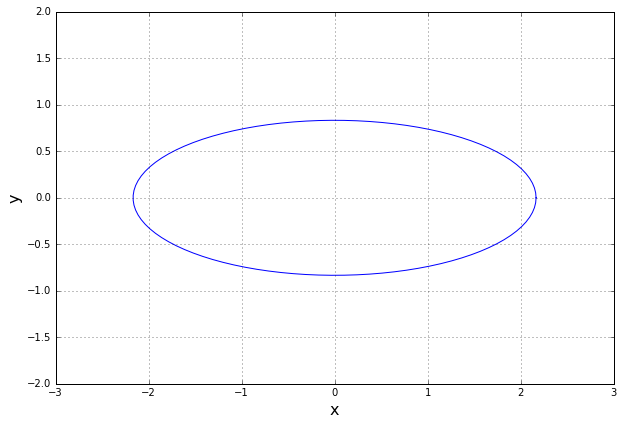

In [7]:
size = 10
x_start, x_end = -3, 3
y_start, y_end = -2, 2
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It becomes an ellipse on xi plane.

In [8]:
R = 1.2
c = 1
z = (c-R+R*np.cos(theta) + R*1j*np.sin(theta))
#circle centered at (c−R,0)
xi = z+c**2/z

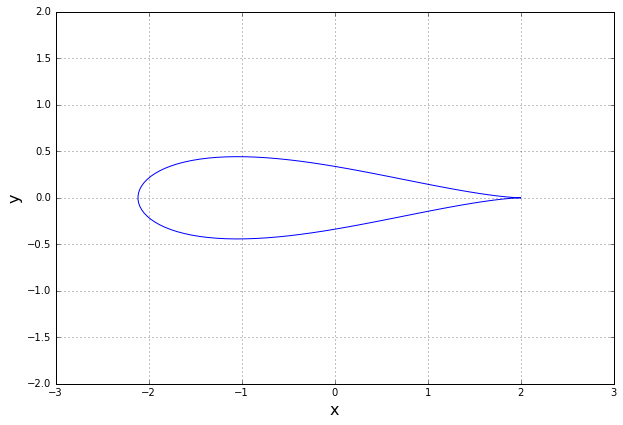

In [9]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now becomes a symmetric airfoil.

In [10]:
delta_x = 0.1
delta_y = 0.1
c = 1
R = math.sqrt((c-delta_x)**2 + delta_y**2)
z = (-delta_x+R*np.cos(theta) + (delta_y+R*np.sin(theta))*1j)
#circle centered at (-delta_x,delta_y)
xi = z+c**2/z

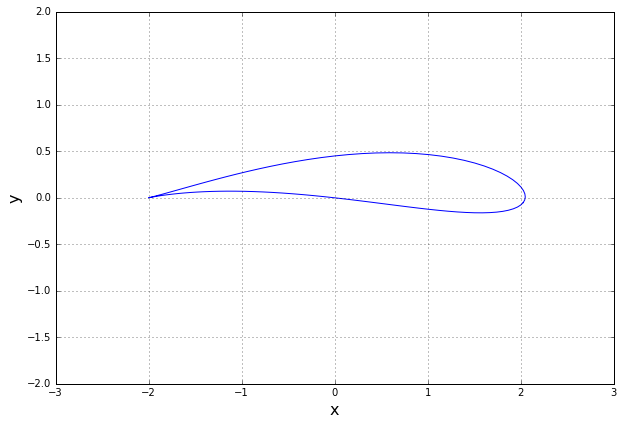

In [11]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now looks like a cambered airfoil.

# Grid points on the z-plane using polar coordinates

In [ ]:
Nr = 100
Ntheta = 145
Radius = 1.15  
c = 1
r = np.linspace(Radius, 5, Nr)
theta = np.linspace(0, 2*np.pi, Ntheta)
R, THETA = np.meshgrid(r, theta)